pi is ------------ for  2 clusters
[[ 0.86581115]
 [ 0.13418885]]
(100, 2)


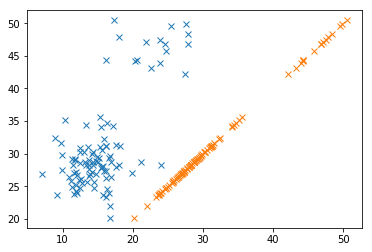

(100,)
pi is ------------ for  2 clusters
[[ 0.81855986]
 [ 0.18144014]]
(1000, 2)


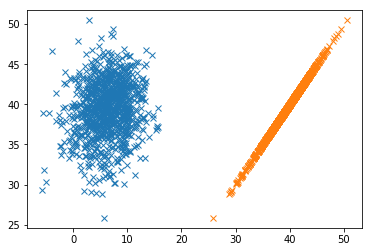

(1000,)
pi is ------------ for  2 clusters
[[ 0.78615022]
 [ 0.21384978]]
(10000, 2)


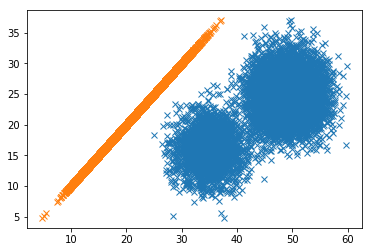

(10000,)
pi is ------------ for  2 clusters
[[ 0.84010677]
 [ 0.15989323]]
(100, 5)


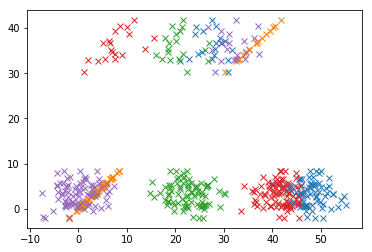

(100,)
pi is ------------ for  2 clusters
[[ 0.89973975]
 [ 0.10026025]]
(1000, 5)


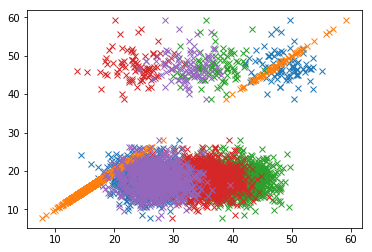

(1000,)
pi is ------------ for  2 clusters
[[ 0.80528191]
 [ 0.19471809]]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

def gausian(mean = [0, 0],cov = [[1, 0], [0, 1]],n=100):
    x = np.random.multivariate_normal(mean, cov, n).T
    return x

def sample_Z(theta ):
    zi = np.random.rand(1,1)
    x= theta[0]

    for i in range(len(theta)):
        if zi < x :
            return i ;
        else :
            x = x +theta[i+1]
    return len(theta) - 1
count = 1

def hund(n , d , k ,s ,count):

    cl1 = []
    z1 = []
    x = np.random.randint(50, size=(k, d));
    for j in range(n):
        i=sample_Z(s)
        x1 = np.random.multivariate_normal(x[i] ,10*np.identity(d), 1).T
        tmp =[]
        for k in range(len(x1)):
            tmp.append(x1[k][0])
                    
        z1.append(i)
        
        cl1.append(  tmp)

    cl1 = np.asarray(cl1)
    np.savetxt('data/'+str(count) +'.csv',cl1,delimiter=',' , fmt='%.10f' )
    np.savetxt('data/z/'+str(count) +'.csv',z1,delimiter=',' , fmt='%.0f' )
    print(np.shape(cl1))
    plt.plot(cl1[:,], cl1[:,1], 'x')
    
    
    # plt.plot(cl1[2], cl2[2], 'x')
    # plt.plot(cl1[3], cl2[3], 'x')
    # plt.plot(cl1[4], cl2[4], 'x')
    # plt.plot(cl1[5], cl2[5], 'x')
#     plt.axis('equal')
    plt.show()
    
    print(np.shape(z1))
    
pi = [(50,10),(50,10,10,10,10), (50, 10,10,10,10,10,10,10,10,10) ]
npoint = [100,1000,10000]
zi = [2,5,10]
 
for i in range(3):
    for j in range(3):
        for k in range(3) :
            s = np.random.dirichlet(pi[i], 1).transpose()
            print("pi is ------------ for ",zi[i] , "clusters")
            print(s)
            print("==================================")
            hund(npoint[k],zi[j],zi[i],s ,count)
            count = count +1 


In [197]:

k = 2
data = np.genfromtxt("data/1.csv" ,delimiter=",")
n , d = np.shape(data)
# k is number of cluster
#cov = np.random.randint(50, size=(d, d));
cov = 10000 * np.identity(d)
means = np.random.randint(500, size=(k, d));
pi = [1/k]*k
for QW in range(1000):
    data = np.genfromtxt("data/1.csv" ,delimiter=",")
    
    print(pi)
    responsibility=[]
    for j in range(k):
        y = multivariate_normal.pdf(data, means[j], cov );
        responsibility.append(y*pi[j])
     
    sum = np.asarray([0]*(n*d)).reshape(k,n)
    

    for j in range(k):
        sum =sum + responsibility[j]
    
    gama = []
    for i in range(k):
        y= (np.divide(responsibility[i],np.asarray(sum[i])))
        gama.append(y)


    gama = np.array(gama)
        
    means=[]
    for i in range(k):
        means.append(np.sum(np.matmul(gama[i].reshape(1,100),data),axis=0) )

    means = np.array(means)
    print(np.shape(means))

    pi=[]
    for i in range(k):
        pi.append(np.sum(gama[i]) / n)
    
    
    cov = []
    for i in range(k):
        tmp2 =[]
        for j in data :
            tmp2.append(np.subtract(means[i],data[i]))
        
        tmp = np.matmul(tmp2,np.array(tmp2).reshape(2,n)) 
        tmp = (np.diag((tmp))).reshape(n,1) ## choosing diagonal only
        y= np.matmul(tmp.T,(gama[i].T.reshape(n,1)) )/np.sum( gama[i])
        cov.append(y[0][0])
     
    cov1 = np.asarray([0]*d*d).reshape(d,d)
    
    for i in range(d):
        cov1[i,i] = cov[i]
    cov =cov1
    print("mamdar " ,cov)
    
    

[0.5, 0.5]
(2, 2)
mamdar  [[ 911935       0]
 [      0 1641751]]
[0.42894533417350111, 0.57105466582649889]
(2, 2)
mamdar  [[1309326       0]
 [      0 1192496]]
[0.51269021934079728, 0.48730978065920277]
(2, 2)
mamdar  [[1242285       0]
 [      0 1258198]]
[0.499669630994384, 0.500330369005616]
(2, 2)
mamdar  [[1243968       0]
 [      0 1256505]]
[0.50000667565933965, 0.49999332434066024]
(2, 2)
mamdar  [[1243934       0]
 [      0 1256539]]
[0.49999990154532176, 0.50000009845467819]
(2, 2)
mamdar  [[1243935       0]
 [      0 1256539]]
[0.50000000055881377, 0.49999999944118628]
(2, 2)
mamdar  [[1243935       0]
 [      0 1256539]]
[0.50000000002674261, 0.49999999997325728]
(2, 2)
mamdar  [[1243935       0]
 [      0 1256539]]
[0.49999999999867645, 0.5000000000013235]
(2, 2)
mamdar  [[1243935       0]
 [      0 1256539]]
[0.50000000000003864, 0.49999999999996136]
(2, 2)
mamdar  [[1243935       0]
 [      0 1256539]]
[0.49999999999999917, 0.50000000000000089]
(2, 2)
mamdar  [[1243935

mamdar  [[1243935       0]
 [      0 1256539]]
[0.5, 0.5]
(2, 2)
mamdar  [[1243935       0]
 [      0 1256539]]
[0.5, 0.5]
(2, 2)
mamdar  [[1243935       0]
 [      0 1256539]]
[0.5, 0.5]
(2, 2)
mamdar  [[1243935       0]
 [      0 1256539]]
[0.5, 0.5]
(2, 2)
mamdar  [[1243935       0]
 [      0 1256539]]
[0.5, 0.5]
(2, 2)
mamdar  [[1243935       0]
 [      0 1256539]]
[0.5, 0.5]
(2, 2)
mamdar  [[1243935       0]
 [      0 1256539]]
[0.5, 0.5]
(2, 2)
mamdar  [[1243935       0]
 [      0 1256539]]
[0.5, 0.5]
(2, 2)
mamdar  [[1243935       0]
 [      0 1256539]]
[0.5, 0.5]
(2, 2)
mamdar  [[1243935       0]
 [      0 1256539]]
[0.5, 0.5]
(2, 2)
mamdar  [[1243935       0]
 [      0 1256539]]
[0.5, 0.5]
(2, 2)
mamdar  [[1243935       0]
 [      0 1256539]]
[0.5, 0.5]
(2, 2)
mamdar  [[1243935       0]
 [      0 1256539]]
[0.5, 0.5]
(2, 2)
mamdar  [[1243935       0]
 [      0 1256539]]
[0.5, 0.5]
(2, 2)
mamdar  [[1243935       0]
 [      0 1256539]]
[0.5, 0.5]
(2, 2)
mamdar  [[1243935       0

mamdar  [[1243935       0]
 [      0 1256539]]
[0.5, 0.5]
(2, 2)
mamdar  [[1243935       0]
 [      0 1256539]]
[0.5, 0.5]
(2, 2)
mamdar  [[1243935       0]
 [      0 1256539]]
[0.5, 0.5]
(2, 2)
mamdar  [[1243935       0]
 [      0 1256539]]
[0.5, 0.5]
(2, 2)
mamdar  [[1243935       0]
 [      0 1256539]]
[0.5, 0.5]
(2, 2)
mamdar  [[1243935       0]
 [      0 1256539]]
[0.5, 0.5]
(2, 2)
mamdar  [[1243935       0]
 [      0 1256539]]
[0.5, 0.5]
(2, 2)
mamdar  [[1243935       0]
 [      0 1256539]]
[0.5, 0.5]
(2, 2)
mamdar  [[1243935       0]
 [      0 1256539]]
[0.5, 0.5]
(2, 2)
mamdar  [[1243935       0]
 [      0 1256539]]
[0.5, 0.5]
(2, 2)
mamdar  [[1243935       0]
 [      0 1256539]]
[0.5, 0.5]
(2, 2)
mamdar  [[1243935       0]
 [      0 1256539]]
[0.5, 0.5]
(2, 2)
mamdar  [[1243935       0]
 [      0 1256539]]
[0.5, 0.5]
(2, 2)
mamdar  [[1243935       0]
 [      0 1256539]]
[0.5, 0.5]
(2, 2)
mamdar  [[1243935       0]
 [      0 1256539]]
[0.5, 0.5]
(2, 2)
mamdar  [[1243935       0

mamdar  [[1243935       0]
 [      0 1256539]]
[0.5, 0.5]
(2, 2)
mamdar  [[1243935       0]
 [      0 1256539]]
[0.5, 0.5]
(2, 2)
mamdar  [[1243935       0]
 [      0 1256539]]
[0.5, 0.5]
(2, 2)
mamdar  [[1243935       0]
 [      0 1256539]]
[0.5, 0.5]
(2, 2)
mamdar  [[1243935       0]
 [      0 1256539]]
[0.5, 0.5]
(2, 2)
mamdar  [[1243935       0]
 [      0 1256539]]
[0.5, 0.5]
(2, 2)
mamdar  [[1243935       0]
 [      0 1256539]]
[0.5, 0.5]
(2, 2)
mamdar  [[1243935       0]
 [      0 1256539]]
[0.5, 0.5]
(2, 2)
mamdar  [[1243935       0]
 [      0 1256539]]
[0.5, 0.5]
(2, 2)
mamdar  [[1243935       0]
 [      0 1256539]]
[0.5, 0.5]
(2, 2)
mamdar  [[1243935       0]
 [      0 1256539]]
[0.5, 0.5]
(2, 2)
mamdar  [[1243935       0]
 [      0 1256539]]
[0.5, 0.5]
(2, 2)
mamdar  [[1243935       0]
 [      0 1256539]]
[0.5, 0.5]
(2, 2)
mamdar  [[1243935       0]
 [      0 1256539]]
[0.5, 0.5]
(2, 2)
mamdar  [[1243935       0]
 [      0 1256539]]
[0.5, 0.5]
(2, 2)
mamdar  [[1243935       0

[0.5, 0.5]
(2, 2)
mamdar  [[1243935       0]
 [      0 1256539]]
[0.5, 0.5]
(2, 2)
mamdar  [[1243935       0]
 [      0 1256539]]
[0.5, 0.5]
(2, 2)
mamdar  [[1243935       0]
 [      0 1256539]]
[0.5, 0.5]
(2, 2)
mamdar  [[1243935       0]
 [      0 1256539]]
[0.5, 0.5]
(2, 2)
mamdar  [[1243935       0]
 [      0 1256539]]
[0.5, 0.5]
(2, 2)
mamdar  [[1243935       0]
 [      0 1256539]]
[0.5, 0.5]
(2, 2)
mamdar  [[1243935       0]
 [      0 1256539]]
[0.5, 0.5]
(2, 2)
mamdar  [[1243935       0]
 [      0 1256539]]
[0.5, 0.5]
(2, 2)
mamdar  [[1243935       0]
 [      0 1256539]]
[0.5, 0.5]
(2, 2)
mamdar  [[1243935       0]
 [      0 1256539]]
[0.5, 0.5]
(2, 2)
mamdar  [[1243935       0]
 [      0 1256539]]
[0.5, 0.5]
(2, 2)
mamdar  [[1243935       0]
 [      0 1256539]]
[0.5, 0.5]
(2, 2)
mamdar  [[1243935       0]
 [      0 1256539]]
[0.5, 0.5]
(2, 2)
mamdar  [[1243935       0]
 [      0 1256539]]
[0.5, 0.5]
(2, 2)
mamdar  [[1243935       0]
 [      0 1256539]]
[0.5, 0.5]
(2, 2)
mamdar 

(2, 2)
mamdar  [[1243935       0]
 [      0 1256539]]
[0.5, 0.5]
(2, 2)
mamdar  [[1243935       0]
 [      0 1256539]]
[0.5, 0.5]
(2, 2)
mamdar  [[1243935       0]
 [      0 1256539]]
[0.5, 0.5]
(2, 2)
mamdar  [[1243935       0]
 [      0 1256539]]
[0.5, 0.5]
(2, 2)
mamdar  [[1243935       0]
 [      0 1256539]]
[0.5, 0.5]
(2, 2)
mamdar  [[1243935       0]
 [      0 1256539]]
[0.5, 0.5]
(2, 2)
mamdar  [[1243935       0]
 [      0 1256539]]
[0.5, 0.5]
(2, 2)
mamdar  [[1243935       0]
 [      0 1256539]]
[0.5, 0.5]
(2, 2)
mamdar  [[1243935       0]
 [      0 1256539]]
[0.5, 0.5]
(2, 2)
mamdar  [[1243935       0]
 [      0 1256539]]
[0.5, 0.5]
(2, 2)
mamdar  [[1243935       0]
 [      0 1256539]]
[0.5, 0.5]
(2, 2)
mamdar  [[1243935       0]
 [      0 1256539]]
[0.5, 0.5]
(2, 2)
mamdar  [[1243935       0]
 [      0 1256539]]
[0.5, 0.5]
(2, 2)
mamdar  [[1243935       0]
 [      0 1256539]]
[0.5, 0.5]
(2, 2)
mamdar  [[1243935       0]
 [      0 1256539]]
[0.5, 0.5]
(2, 2)
mamdar  [[1243935 

[0.5, 0.5]
(2, 2)
mamdar  [[1243935       0]
 [      0 1256539]]
[0.5, 0.5]
(2, 2)
mamdar  [[1243935       0]
 [      0 1256539]]
[0.5, 0.5]
(2, 2)
mamdar  [[1243935       0]
 [      0 1256539]]
[0.5, 0.5]
(2, 2)
mamdar  [[1243935       0]
 [      0 1256539]]
[0.5, 0.5]
(2, 2)
mamdar  [[1243935       0]
 [      0 1256539]]
[0.5, 0.5]
(2, 2)
mamdar  [[1243935       0]
 [      0 1256539]]
[0.5, 0.5]
(2, 2)
mamdar  [[1243935       0]
 [      0 1256539]]
[0.5, 0.5]
(2, 2)
mamdar  [[1243935       0]
 [      0 1256539]]
[0.5, 0.5]
(2, 2)
mamdar  [[1243935       0]
 [      0 1256539]]
[0.5, 0.5]
(2, 2)
mamdar  [[1243935       0]
 [      0 1256539]]
[0.5, 0.5]
(2, 2)
mamdar  [[1243935       0]
 [      0 1256539]]
[0.5, 0.5]
(2, 2)
mamdar  [[1243935       0]
 [      0 1256539]]
[0.5, 0.5]
(2, 2)
mamdar  [[1243935       0]
 [      0 1256539]]
[0.5, 0.5]
(2, 2)
mamdar  [[1243935       0]
 [      0 1256539]]
[0.5, 0.5]
(2, 2)
mamdar  [[1243935       0]
 [      0 1256539]]
[0.5, 0.5]
(2, 2)
mamdar 

(2, 2)
mamdar  [[1243935       0]
 [      0 1256539]]
[0.5, 0.5]
(2, 2)
mamdar  [[1243935       0]
 [      0 1256539]]
[0.5, 0.5]
(2, 2)
mamdar  [[1243935       0]
 [      0 1256539]]
[0.5, 0.5]
(2, 2)
mamdar  [[1243935       0]
 [      0 1256539]]


In [ ]:
    
    means=[]
    for i in range(k):
        means.append(np.sum(np.matmul(gama[i].reshape(1,100),data),axis=0) )

    means = np.array(means)
    print(np.shape(means))

    pi=[]
    for i in range(k):
        pi.append(np.sum(gama[i]) / n)
    print(pi)
    
    cov = []
    for i in range(k):
        tmp2 =[]
        for j in data :
            tmp2.append(np.subtract(means[i],data[i]))
        print(np.shape(tmp2))
        tmp = np.matmul(tmp2,np.array(tmp2).reshape(2,n)) 
        tmp = (np.diag((tmp))).reshape(n,1) ## choosing diagonal only
        y= np.matmul(tmp.T,(gama[i].T.reshape(n,1)) )/np.sum( sum[i])
        cov.append(y[0][0])
    print(np.sum( sum[i]))
    cov1 = np.asarray([0]*d*d).reshape(d,d)
    for i in range(d):
        cov1[i,i] = cov[i]
    cov =cov1
    


In [67]:
x = np.asarray([0]*d*d).reshape(d,d)

In [21]:
np.sum(np.multiply(np.asarray([2,1,0]).T,np.asarray([[1,2],[4,5],[1,1]]).T),axis=0)
np.sum(np.multiply(np.array([2,1,0]).reshape(3,1) ,np.asarray([[1,2],[4,5],[1,1]])),axis=0)

array([6, 9])

In [69]:
# x = np.divide(np.asarray([[4,2],[4,2]])+ np.asarray([[4,2],[4,2]]),np.asarray([[2,2],[2,2]]))
x[1,1] =1
x


array([[0, 0],
       [0, 1]])

In [43]:
np.sum([1,2,3])

6